# Titanic Analysis

## Overview - Understanding the Problem
In this notebook, I will provide my take for the solution and thought process of each step as I go along in my attempt at the [Kaggle Titanic surivival prediction competition](https://www.kaggle.com/c/titanic/overview). The goal of this competition is to predict whether or not a passenger on the Titnic had survived using what we know about the other passengers.  We will accomplish this by training a machine learning model to learn the relationship between passenger features and predict the likelihood of their survial outcome.  

Given the nature that this is my first Kaggle competition submission, I drew inspirations from the following notebooks in the making of this notebook:
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions) by [Manav Sehgal](https://www.kaggle.com/startupsci).
- [Titanic Survival Prediction Competition](https://www.kaggle.com/jasonchong914/titanic-survival-prediction-competition) by [Jason Chong](https://www.kaggle.com/jasonchong914).
- [Titanic Project Example](https://www.kaggle.com/kenjee/titanic-project-example) by [Ken Jee](https://www.kaggle.com/kenjee).

---
Notebook Structure

* **Overview - Understanding the Problem**
    - Intial Setup and Imports
* **Aquisition of Data**
* **Exploratory Data Analysis (EDA)**
    - Data Types
    - Unique values
    - Missing Data
    - Feature Analysis
        - Column Names
        - Categorical Data
        - Numerical Data
* **Data Cleaning, Wrangling, and Processing**
    - Encoding
        - Converting Categorical Data to Numeric
    - Imputing Missing Values
    - Droping Columns
* **Feature Engineering**
-----------------
* **Model Builing**
* **Evaluation & Results**

#### Initial Setup and Imports
These are the Python libraries I will be using for this project, as well as some set up options for viewing content in this notebook.

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import missingno

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Set warning display options
import warnings
warnings.filterwarnings('ignore')

# Set Pandas display options
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
pd.set_option('precision', 4)

## Aquisition of Data

The [provided datasets](https://www.kaggle.com/c/titanic/data) we'll be working with is split into a training set and a test set.  The training set is what we will be using to train the machine learning model to make predictions and the test set is what we will use to validate those predictions.

In [3]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Data analyis and wrangling
train_df.name = 'train_df'
test_df.name = 'test_df'
all_df = [train_df, test_df]

In [4]:
# View datasets
for df in all_df:
    print(('-' * 10),df.name,('-' * 10))
    display(df.head())

---------- train_df ----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---------- test_df ----------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the process of visualizing and analysing data to extract insights. Basically we want to identify characteristics or trends in the data to get a better understanding of what we're working with.  Before working with any dataset, it is a good idea to get a good understanding of what we're working with before we start working with it.  Things to explore:
- The shape - How many rows (observations) and columns (features) in the dataset
- Datatypes - Strings, integers, floats, etc. (Categorical vs. Numerical Data)
- Column Names - Features
- Missing Data - Not a Number (NaN) and Null values
- Unique Values 

#### Shape of datasets

In [5]:
for df in all_df:
    print(f'{df.name} shape: {df.shape}')

train_df shape: (891, 12)
test_df shape: (418, 11)


#### Date Types

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Unique values

[Reference](https://datascience.stackexchange.com/questions/20114/do-unique-values-has-to-be-removed)

Columns with only one unique value have no predictive power, since the value would also be the same.  We can drop these features, we are dealing with fewer data points and speeds up the notebook by easing the analysis.

In [7]:
for df in all_df:
    unique_df = df.nunique()
    print(('-' * 10),df.name,('-' * 10))
    print(unique_df[unique_df == 1])

---------- train_df ----------
Series([], dtype: int64)
---------- test_df ----------
Series([], dtype: int64)


Since this is a small dataset, there isn't any columns with one unique value.  Even though we found none, I included this part in the analyis as well since finding out nothing is still finding out something about the datasets.

#### Missing Data

We can see that there are 4 columns with missing values that we will need to handle before modeling our machine learning model. Those columns are:
- Cabin
- Age
- Embarked
- Fare

In [8]:
# Find missing values and total percent of missing values from the column
for df in all_df:
    # nan_count_df = df.isnull().sum().sort_values(ascending=False)
    nan_percent_df = df.isnull().mean().sort_values(ascending=False) * 100
    print(('-' * 10),df.name,('-' * 10))
    print(nan_percent_df[nan_percent_df > 0])

---------- train_df ----------
Cabin       77.1044
Age         19.8653
Embarked     0.2245
dtype: float64
---------- test_df ----------
Cabin    78.2297
Age      20.5742
Fare      0.2392
dtype: float64


AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


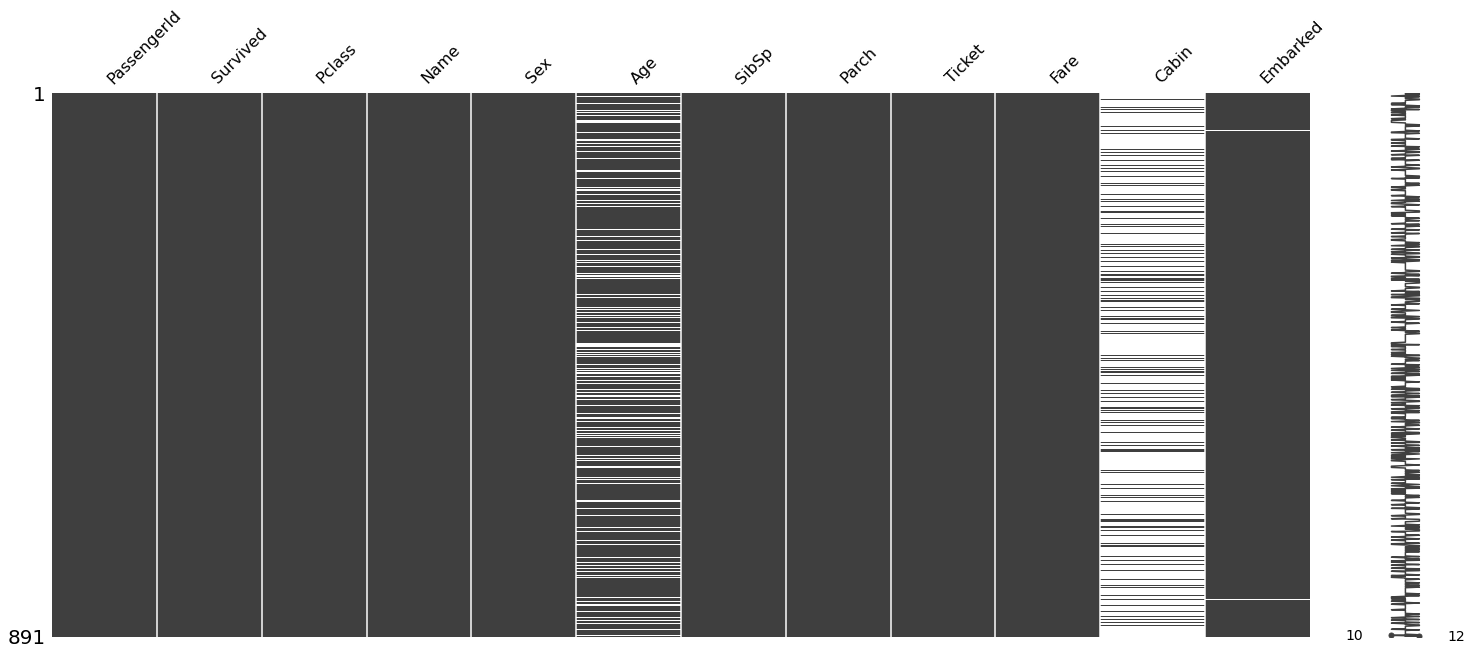

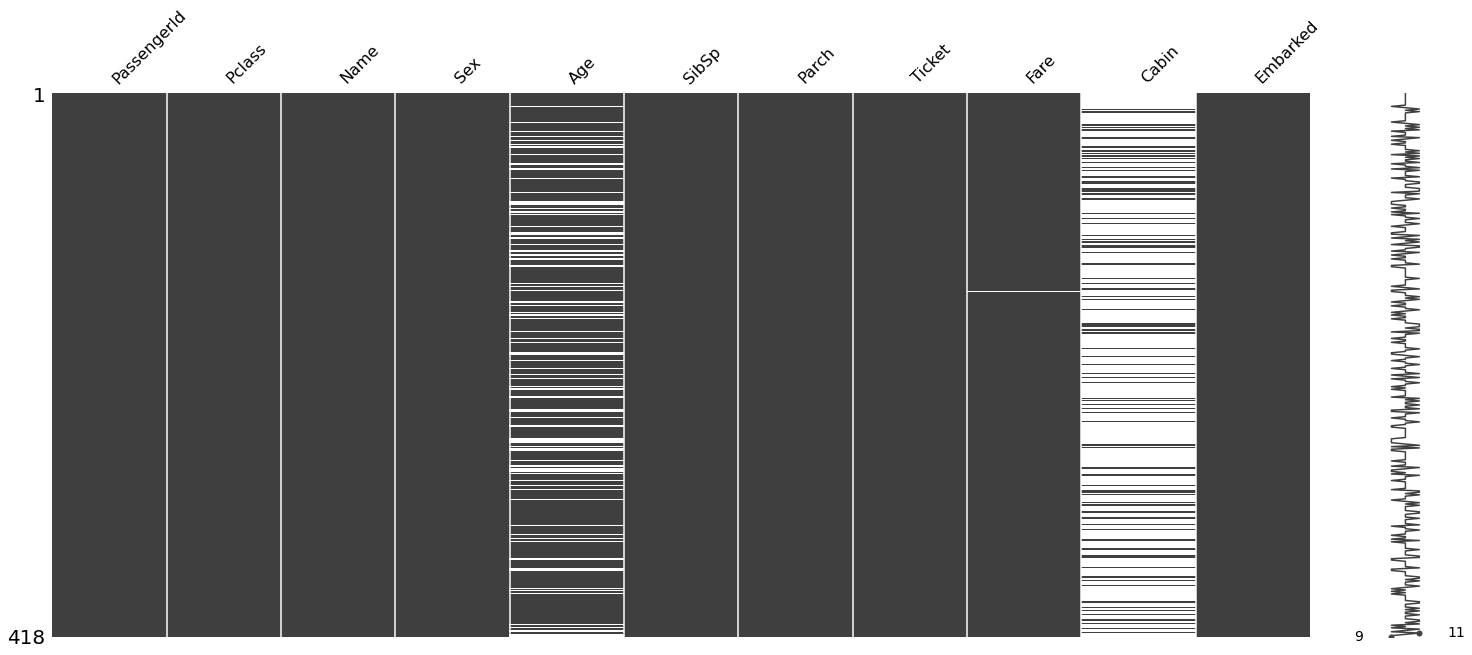

In [9]:
# View of where values are missing in dataset
for df in all_df:
    print(missingno.matrix(df))

#### What features are available in the dataset? (Column Names)

This gives us an idea of what features we will be working with and also what feature we are trying to predict.
- Target Variable: 'Survived'

In [10]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In the next steps, we will note the difference of the features by breaking them down to 2 types, categorical and numerical features.  Categorical features have values that belonging to one or more categories. Numerical features are values with a continuous distribution.  Some categorical features may contain numberical data, for example in this case 'Pclass'. It is important to distingush these values so we can structure our analysis more properly.

#### Which features are catergorical?

In [11]:
# Separate categorical features into their own dataframe
cat_df = train_df[['Pclass','Sex','Ticket','Cabin','Embarked']]
cat_df.head()

,Pclass,Sex,Ticket,Cabin,Embarked
0,3,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,3,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,3,male,373450,NaN,S


In [12]:
# Summary of Categorical Variables
cat_df.describe(include='all')

,Pclass,Sex,Ticket,Cabin,Embarked
count,891.0000,891,891,204,889
unique,NaN,2,681,147,3
top,NaN,male,347082,B96 B98,S
freq,NaN,577,7,4,644
mean,2.3086,NaN,NaN,NaN,NaN
std,0.8361,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN
25%,2.0000,NaN,NaN,NaN,NaN
50%,3.0000,NaN,NaN,NaN,NaN
75%,3.0000,NaN,NaN,NaN,NaN


We will explore these features a bit more by looking at the distributions.

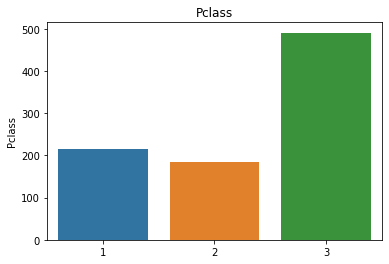

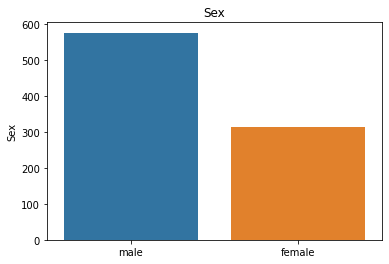

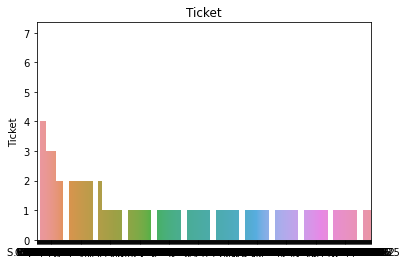

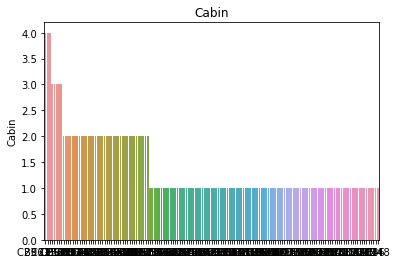

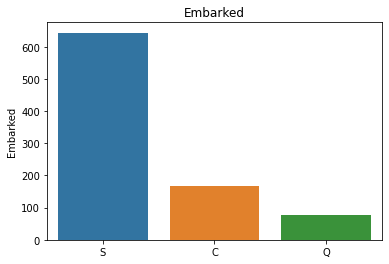

In [13]:
# Distributions of Categorical Data
for col in cat_df.columns:
    sns.barplot(x = cat_df[col].value_counts().index, y = cat_df[col].value_counts()).set_title(col)
    plt.show()

We will also take a look at the unique values of the columns: `Pclass`, `Sex`, and `Embarked`.  We skip `Ticket` and `Cabin` as from what we can see from the distribution graphs, there are too many x values.

In [14]:
# Value Counts for Categorical Columns
for col in ['Pclass', 'Sex', 'Embarked']:
    print('-' * 25, col)
    print(train_df[col].value_counts(dropna=False))

------------------------- Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
------------------------- Sex
male      577
female    314
Name: Sex, dtype: int64
------------------------- Embarked
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


Next, we will look at the survival rate for each of these 3 features.  Some initial findings are:
- It appears there a positive correlation with the survival rate with Pclass as the higher the Pclass, the higher the survival rate.
- There also appears to be a correlation with the survival rate and gender as well, as females have a much higher survival rate compared to males.
- There also appears to be a correlation with survival rate and embarked location as well. While more passengers boarded at location 'S' (644), meanwhile location 'C' with much lower boarded passengers (168) has a higher survival rate.

Some assumptions we can make is that passengers that were women and also passengers with a higher class status were prioritized for evauations.  Another assumption is that a majority of these passengers boared from location 'C'.

------------------------- Pclass -------------------------


,Pclass,Survived
0,1,0.6296
1,2,0.4728
2,3,0.2424


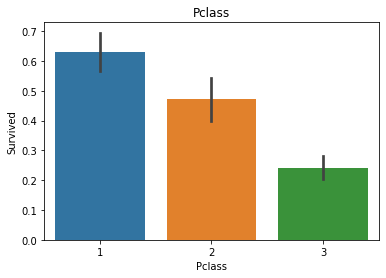

------------------------- Sex -------------------------


,Sex,Survived
0,female,0.7420
1,male,0.1889


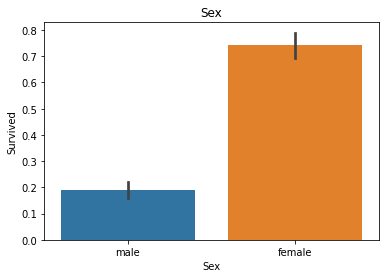

------------------------- Embarked -------------------------


,Embarked,Survived
0,C,0.5536
1,Q,0.3896
2,S,0.3370


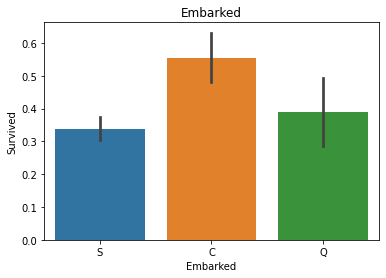

In [15]:
# Mean of Target Variable (Survived) by Categorical Variable
for col in ['Pclass', 'Sex', 'Embarked']:
    print('-' * 25, col,'-' * 25)
    display(train_df[[col, 'Survived']].groupby(col, as_index=False).mean().sort_values(by='Survived', ascending=False))
    sns.barplot(x=col, y='Survived', data=train_df).set_title(col)
    plt.show()

Now that we have looked at the survival rate of each feature individually, we will also look at the survival rate compared to a combination of the features.
- Starting with the survival rate of gender and as well as the class status, we can see ...
- Looking at the amount of passengers that embarked at each location, we can see that majority of first class embarked from locations 'S' and 'C', second class from 'S', and third class at all three locations.
- We can also see that there was more men that boarded than women from all three locations.

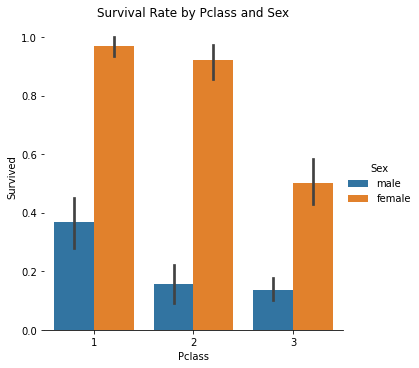

In [16]:
# Sex vs Pclass
grid = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar')
grid.despine(left=True)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survived')
plt.show()

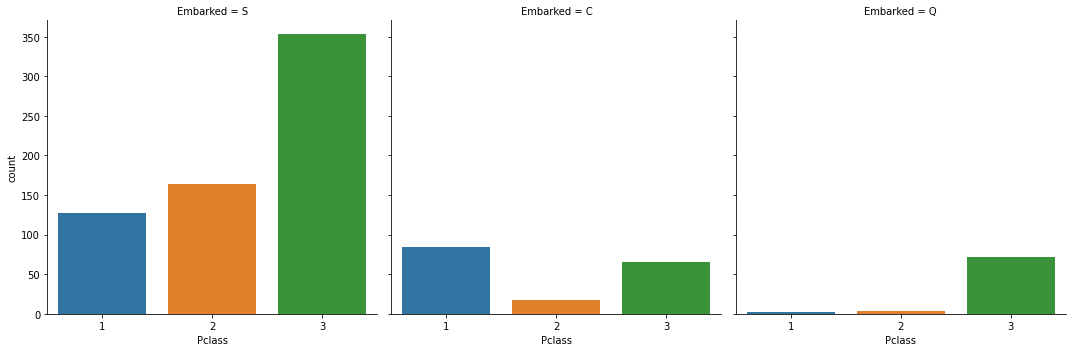

In [17]:
# Embarked vs Pclass
sns.catplot(x='Pclass', col='Embarked', data=train_df, kind='count')
plt.show()

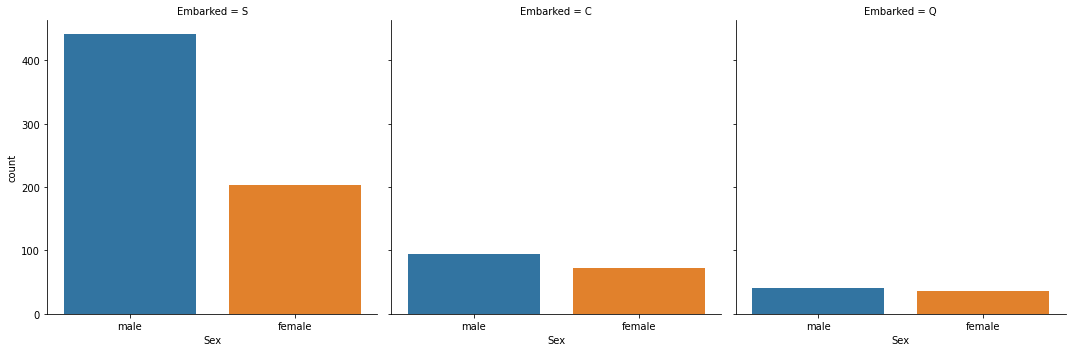

In [18]:
# Sex vs Pclass
sns.catplot(x='Sex', col='Embarked', data=train_df, kind='count')
plt.show()

We will also look at the survival rate against all 3 features together

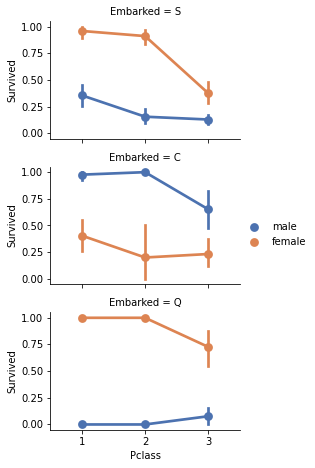

In [19]:
#Survival Rate beween Pclass,Embarked, and Sex
grid = sns.FacetGrid(train_df, row='Embarked' , height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Which features are numerical?

In [20]:
num_df = train_df[['Survived','Age','SibSp','Parch','Fare']]
num_df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [21]:
# Summary statistics
num_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,29.6991,0.5230,0.3816,32.2042
std,0.4866,14.5265,1.1027,0.8061,49.6934
min,0.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,80.0000,8.0000,6.0000,512.3292


,Survived,Age,SibSp,Parch,Fare
Survived,1.0000,-0.0772,-0.0353,0.0816,0.2573
Age,-0.0772,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0353,-0.3082,1.0000,0.4148,0.1597
Parch,0.0816,-0.1891,0.4148,1.0000,0.2162
Fare,0.2573,0.0961,0.1597,0.2162,1.0000


<AxesSubplot:>

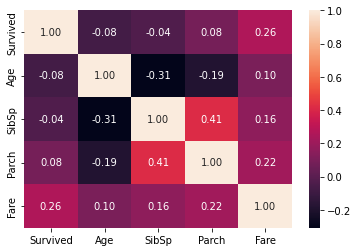

In [22]:
# Correlation of numeric data
display(num_df.corr())
sns.heatmap(num_df.corr(), annot=True, fmt='.2f')

As we did with the categorical data, we will also look at the distributions of each numeric feature.

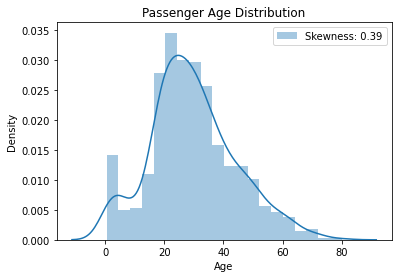

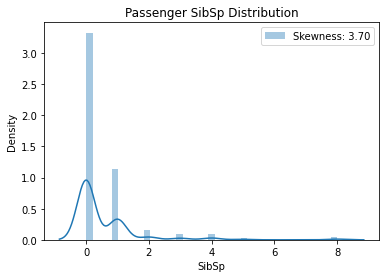

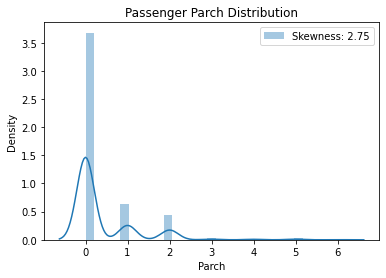

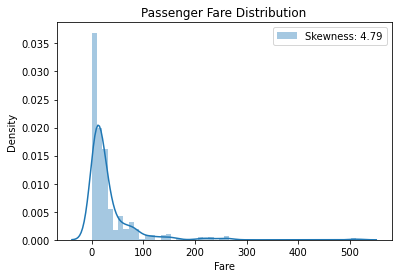

In [23]:
num_df2 = num_df.drop('Survived', axis=1)

# Distributions of numeric data
for col in num_df2.columns:
    sns.distplot(train_df[col], label='Skewness: %.2f'%(train_df[col].skew()))
    plt.title(f'Passenger {col} Distribution')
    plt.legend(loc='best')
    plt.show()

And like we did with the catgegorical features, we will also look at the survival rate of each numeric feature.

In [24]:
# Survival rate across numerical features
pd.pivot_table(train_df, index = 'Survived', values = num_df2.columns.values)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.6262,22.1179,0.3297,0.5537
1,28.3437,48.3954,0.4649,0.4737


We see that the Age and Fare columns have the highest survival rates. We can explore the Age column a bit more to get a better understanding.  For the Fare column, it might be correlated with Pclass, as higher fares were paid for the upper class.

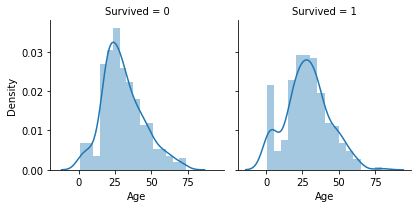

In [25]:
# Distribution of Survival Rate by Age
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(sns.distplot, 'Age')

By looking at the distributions of the Age feature, we see what age ranges had a better survival rate. It might be hard to tell from the above distribution plot, so what we can do is plot them on the same graph to get a better insight.

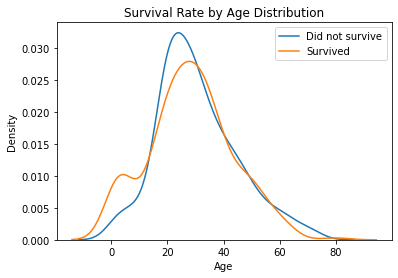

In [26]:
# Distributions of Survival rate by Age on the same graph
sns.kdeplot(train_df['Age'][train_df['Survived'] == 0], label= 'Did not survive')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 1], label= 'Survived')
plt.title('Survival Rate by Age Distribution')
plt.xlabel('Age')
plt.legend(loc='best')
plt.show()

From the above distribution graphs, what we can assume is that children were also prioritized in the evacuations.

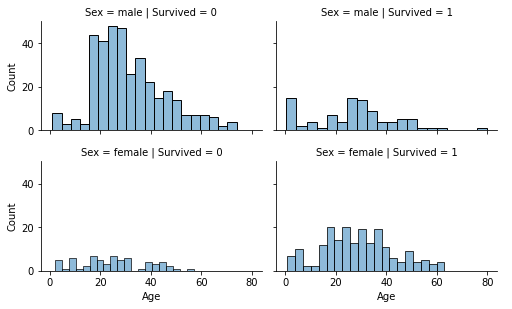

In [27]:
#Survival Distribution beween Age and Sex
grid = sns.FacetGrid(train_df, row='Sex', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

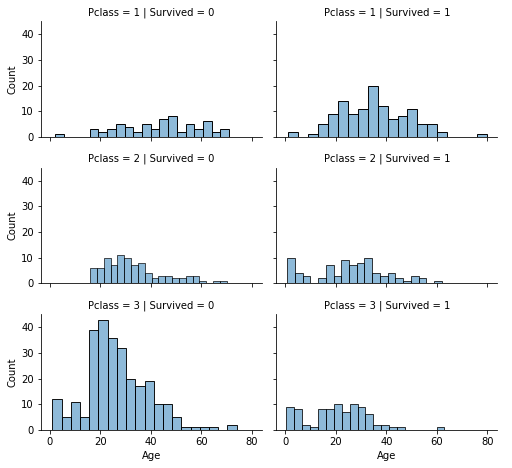

In [28]:
# Survival Distribution beween Age and Pclass
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

Some insights we can draw from the above graph is that Pclass and survival rate are inversly ralated.  For the lower passenger class (Pclass 3), there are more passengers that did not survive, meanwhile the high passenger class (Pclass 1), there are more passengers that survived.

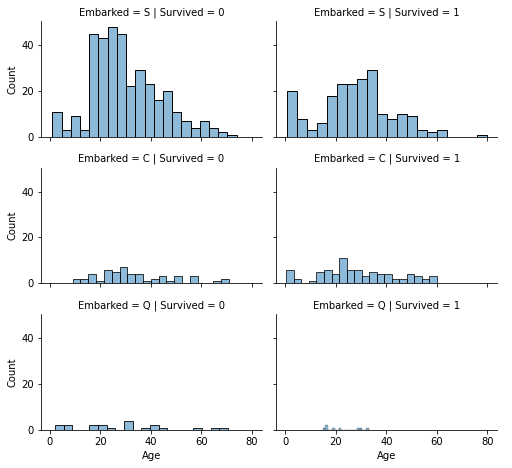

In [29]:
#Survival Distribution beween Age and Embarked
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

In [30]:
# Value Counts for SibSp and Parch
for col in ['SibSp', 'Parch']:
    print('-' * 25, col)
    print(train_df[col].value_counts(dropna=False))

------------------------- SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
------------------------- Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [31]:
# Survival Rate for SibSp and Parch
for col in ['SibSp', 'Parch']:
    print('-' * 25, col)
    display(train_df[[col,'Survived']].groupby(col, as_index=False).mean().sort_values(by='Survived', ascending=False))

------------------------- SibSp


,SibSp,Survived
1,1,0.5359
2,2,0.4643
0,0,0.3454
3,3,0.2500
4,4,0.1667
5,5,0.0000
6,8,0.0000


------------------------- Parch


,Parch,Survived
3,3,0.6000
1,1,0.5508
2,2,0.5000
0,0,0.3437
5,5,0.2000
4,4,0.0000
6,6,0.0000


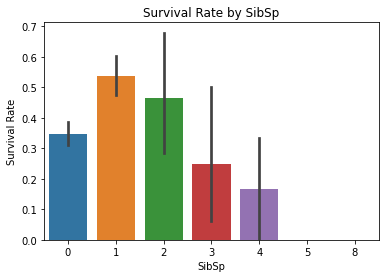

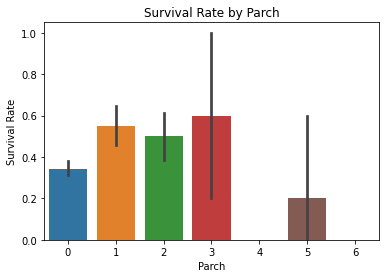

In [32]:
# Survival Rate for SibSp and Parch
for col in ['SibSp', 'Parch']:
    sns.barplot(x=col, y='Survived', data=train_df)
    plt.ylabel('Survival Rate')
    plt.title(f'Survival Rate by {col}')
    plt.show()

The columns `SibSp` represents the number of siblings and spouses aboard where was the `Parch` column represents the number of parents and children aboard.  What we can extract from the above visualizations is that passengers with 1 - 2 siblings or spouses had a higher survival rate. Furthermore, passengers with 1 - 3 parents and/or children also had higher survival rates.

## Data Cleaning, Wrangling, and Processing

In this section, we will use the following techniques to wrangle the data and prepare it for modeling:
- Encoding, converting categorical data to numeric data
- Imputation, handing missing data
- Feature Selection, dropping columns not used for prediction
- Feature Engineering, creating new features from existing features

In [33]:
for df in all_df:
    print(('-' * 10),df.name,('-' * 10))
    display(df.head())

---------- train_df ----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---------- test_df ----------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Encoding

- Converting Categorical to Numeric Data

In [34]:
# Converting Sex column from categorical values to numerical values, (male = 0, female =1)
for df in all_df:
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)
    display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### Imputing Missing values

Going back to our missing values, we have 4 columns with missing values from the datasets: `Cabin`, `Age`, `Embarked`, and `Fare`.  We'll impute values for `Embarked`, `Fare`, and `Age`.

For the `Cabin` column, since most of the values (>77%) are missing from the datasets, it would be best to drop this column.

In [35]:
# Count of missing values before imputing
for df in all_df:
    nan_count_df = df.isnull().sum().sort_values(ascending=False)
    print(('-' * 10),df.name,('-' * 10))
    print(nan_count_df[nan_count_df > 0])

---------- train_df ----------
Cabin       687
Age         177
Embarked      2
dtype: int64
---------- test_df ----------
Cabin    327
Age       86
Fare       1
dtype: int64


#### NaN - Training set - `Embarked` column

We can draw some insights about the missing values from the `Embarked` column from the other features. Some insights we can extract by looking at these 2 observations is the following:
* These 2 passengers stayed in the same cabin (B28).
* They are both female, one at age 38 and the other at 62.
* They paid the same prie for the ticket, $80.
* The ticket is the same #113572

We can assume that these 2 came as a pair from the same location, and stayed together in the same cabin.

In [36]:
# Embarked NaNs into a dataframe
null_Embarked = train_df[train_df["Embarked"].isnull()]
null_Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


Since they stayed inside cabin B28, we explore the passengers that stayed inside cabins starting with 'B' and see if we can get any additional insights

In [37]:
# Passengers who stayed in cabins starting with 'B' in a dataframe
cab_B_df = train_df[train_df['Cabin'].str[0].isin(['B'])]
cab_B_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,24.0,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",0,24.0,0,0,PC 17593,79.2000,B86,C


In [38]:
# Count of Embarked Locations who stayed in cabins starting with 'B'
print(cab_B_df['Embarked'].value_counts())

S    23
C    22
Name: Embarked, dtype: int64


We see that passengers that resided in the 'B' cabins either embarked from location S or C. Since we know these 2 passengers payed $80, lets further explore the `Fare` feature.

In [39]:
# Isolate passengers who embarked from location 'S' 
Embarked_S_df = train_df[train_df['Embarked'] == 'S']
# Isolate passengers who embarked from location 'C' 
Embarked_C_df = train_df[train_df['Embarked'] == 'C']

# Summary staticstics of fare prices by location
print(Embarked_S_df['Fare'].describe())
print(Embarked_C_df['Fare'].describe())

count    644.0000
mean      27.0798
std       35.8880
min        0.0000
25%        8.0500
50%       13.0000
75%       27.9000
max      263.0000
Name: Fare, dtype: float64
count    168.0000
mean      59.9541
std       83.9130
min        4.0125
25%       13.6980
50%       29.7000
75%       78.5000
max      512.3292
Name: Fare, dtype: float64


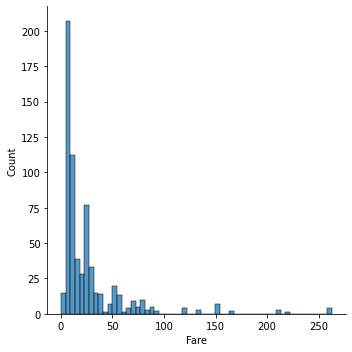

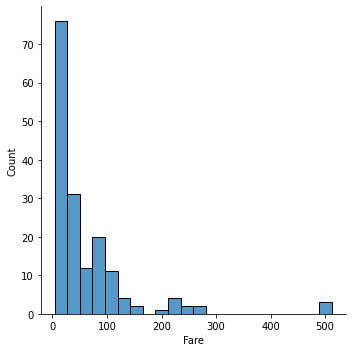

In [40]:
# Distribution of fare prices
display(sns.displot(Embarked_S_df['Fare']),sns.displot(Embarked_C_df['Fare']))

We can see from the distribution that for the fewer the passengers, the higher the fare price. Since the fare prices correlate with the Pclass, we can explore the Fare feature even more by looking at Pclass next.

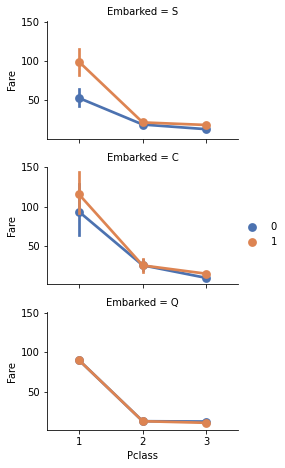

In [41]:
# Fare rate of embarked locations and Pclass separated by gender
grid = sns.FacetGrid(train_df, row='Embarked' , height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Fare', 'Sex', palette='deep')
grid.add_legend()

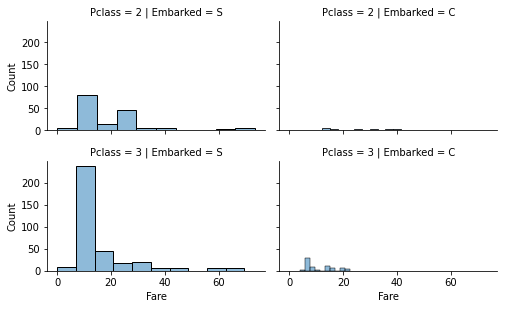

In [42]:
# Isolate passengers that embarked from locatoins 'S' and 'C' only
Embarked_SC_df = train_df[train_df['Embarked'] != 'Q']

# Isolate passengers that embarked from locations 'S' and 'C' in Pclass 1
Embarked_SC_P1_df = Embarked_SC_df[Embarked_SC_df['Pclass'] ==1]
# Isolate passengers that embarked from locations 'S' and 'C' in Pclass 2 and 3
Embarked_SC_P23_df = Embarked_SC_df[Embarked_SC_df['Pclass'] !=1]

# Fare Distribution beween Pclass 2 and 3 vs Embarked locations 'S' and 'C'
grid = sns.FacetGrid(Embarked_SC_P23_df, row='Pclass', col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Fare', alpha=0.5, bins=10)
grid.add_legend()
plt.show()

In [43]:
# Summary staticstics of passengers Pclass 2 & 3 from locations 'S' and 'C'
print(Embarked_SC_P23_df['Fare'].describe())

count    600.0000
mean      16.1238
std       13.0905
min        0.0000
25%        7.8958
50%       10.5000
75%       20.5250
max       73.5000
Name: Fare, dtype: float64


We can see that from the distribution of passengers in the lower classes did not pay a fare above 73.  Since our subject passengers paid a fare of 80, we can assume fow mow they are of the Pclass 1, so we can narrow down and explore the features of Pclass 1 next.

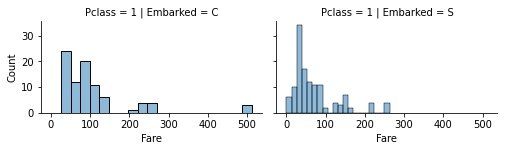

In [44]:
# Fare Distribution beween Pclass 1 and Embarked 'S' and 'C'
grid = sns.FacetGrid(Embarked_SC_P1_df, row='Pclass', col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Fare', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

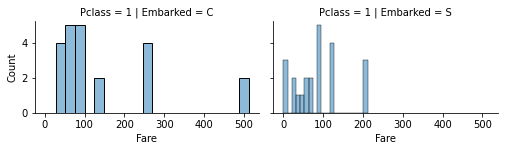

In [45]:
# Fare distribution of Pclass 1 from Embarked locations 'S' and C' in Cabins starting with 'B'
Embarked_SC_P1_CabB_df = Embarked_SC_P1_df[Embarked_SC_P1_df['Cabin'].str[0].isin(['B'])]

grid = sns.FacetGrid(Embarked_SC_P1_CabB_df, row='Pclass', col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Fare', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

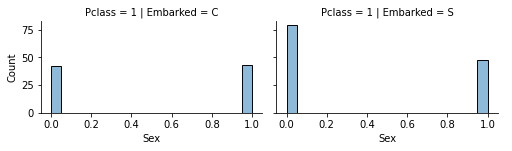

In [46]:
# Gender Distribution beween Pclass 1 and Embarked locations 'S' and 'C'
grid = sns.FacetGrid(Embarked_SC_P1_df, row='Pclass', col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Sex', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

In [47]:
# Isolate Pclass 1 passengers to locations starting with 'S'
Embarked_S_P1_df = Embarked_SC_P1_df[Embarked_SC_P1_df['Embarked'] == 'S']
# Isolate Pclass 1 passengers to locations starting with 'C'
Embarked_C_P1_df = Embarked_SC_P1_df[Embarked_SC_P1_df['Embarked'] == 'C']

# Values counts of gender from each location (male = 0, female = 1)
print(Embarked_S_P1_df['Sex'].value_counts())
print(Embarked_C_P1_df['Sex'].value_counts())

0    79
1    48
Name: Sex, dtype: int64
1    43
0    42
Name: Sex, dtype: int64


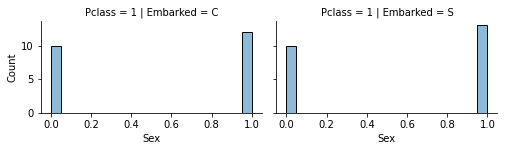

In [48]:
# Isolate Pclass 1 passengers who embarked from locations 'S' and 'C' and stayed in cabins starting with 'B'
Embarked_SC_P1_CabB_df = Embarked_SC_P1_df[Embarked_SC_P1_df['Cabin'].str[0].isin(['B'])]

grid = sns.FacetGrid(Embarked_SC_P1_CabB_df, row='Pclass', col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.histplot, 'Sex', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

In [49]:
# Isolate passengers of Pclass 1 who stayed in cabins starting with B to and embarked from location 'S'
Embarked_S_P1_CabB_df = Embarked_SC_P1_CabB_df[Embarked_SC_P1_CabB_df['Embarked'] == 'S']
# Isolate passengers of Pclass 1 who stayed in cabins starting with B to and embarked from location 'C'
Embarked_C_P1_CabB_df = Embarked_SC_P1_CabB_df[Embarked_SC_P1_CabB_df['Embarked'] == 'C']

# Value counts of gender
print(Embarked_S_P1_CabB_df['Sex'].value_counts())
print(Embarked_C_P1_CabB_df['Sex'].value_counts())

1    13
0    10
Name: Sex, dtype: int64
1    12
0    10
Name: Sex, dtype: int64


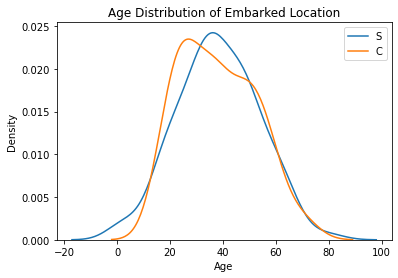

In [50]:
# Passenger Age 38 and 62
# Age Distribution beween Pclass 1 and Embarked locations 'S' and 'C'
sns.kdeplot(Embarked_SC_P1_df['Age'][Embarked_SC_P1_df['Embarked'] == 'S'], label= 'S')
sns.kdeplot(Embarked_SC_P1_df['Age'][Embarked_SC_P1_df['Embarked'] == 'C'], label= 'C')
plt.title('Age Distribution of Embarked Location')
plt.xlabel('Age')
plt.legend(loc='best')
plt.show()

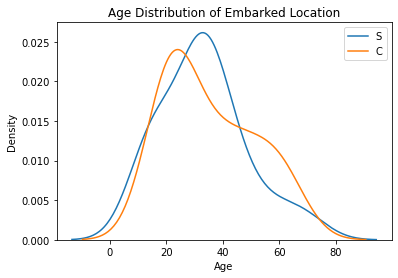

In [51]:
# Isolate passengers of Pclass 1, embarked from location 'S and 'C' and stayed in cabins starting with 'B'
Embarked_SC_P1_CabB_df = Embarked_SC_P1_df[Embarked_SC_P1_df['Cabin'].str[0].isin(['B'])]

# Passenger Age 38 and 62
# Age Distribution beween passengers of Pclass 1, Embarked locations 'S' and 'C', and stayed in cabins starting with 'B'
sns.kdeplot(Embarked_SC_P1_CabB_df['Age'][Embarked_SC_P1_CabB_df['Embarked'] == 'S'], label= 'S')
sns.kdeplot(Embarked_SC_P1_CabB_df['Age'][Embarked_SC_P1_CabB_df['Embarked'] == 'C'], label= 'C')
plt.title('Age Distribution of Embarked Location')
plt.xlabel('Age')
plt.legend(loc='best')
plt.show()

After our EDA of the Embarked column, its still quite hard to distingush which location.  While we did narrow or asumptions down to to Pclass 1 and also two locations, S and C, the distributions between locations 'S' and 'C' are still fairly similar.  What we can do is train the model with one location (i.e. 'S') and then train a different model with the other location (i.e. 'C') and then compare the results.  
(After modeling, the results of using S or C appeared to be the same)

Another solution that required less steops, is to use the mode, or the most frequently occuring observation, to replace the missing values.

In [52]:
# Compute the mode for Embarked column
train_df["Embarked"].value_counts().head(1)

S    644
Name: Embarked, dtype: int64

In [53]:
# Replace missing value with mode
train_df["Embarked"].replace(np.nan, "S", inplace=True)

# NaN values after imputing
train_df['Embarked'].isnull().sum()

0

#### NaN - Test Data - `Fare` column

For the `Fare` column, we will use the median to replace the NaN value.

In [54]:
# Compute median for Fare column
test_df['Fare'].median()

14.4542

In [55]:
# Replace missing value with median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# NaN values after imputing
test_df['Fare'].isnull().sum()

0

#### NaN - `Age` cloumn

Now to predict the values for the `Age` column, we will do the same as we did the `Embarked` column by looking at the other features. The most accurate way to do so would be to use other correlated features such as and Pclass.  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,-0.0429,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,0.5434,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.1319,-0.3692,0.0831,0.0184,-0.5495
Sex,-0.0429,0.5434,-0.1319,1.0000,-0.0933,0.1146,0.2455,0.1823
Age,0.0368,-0.0772,-0.3692,-0.0933,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,0.1146,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,0.2455,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.1823,0.0961,0.1597,0.2162,1.0000


<AxesSubplot:>

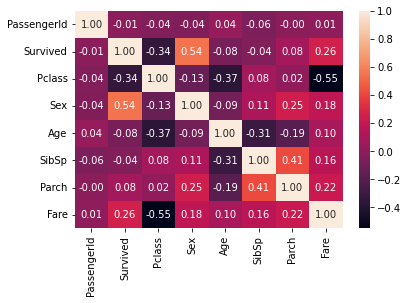

In [56]:
# Correlation of numeric data
display(train_df.corr())
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')

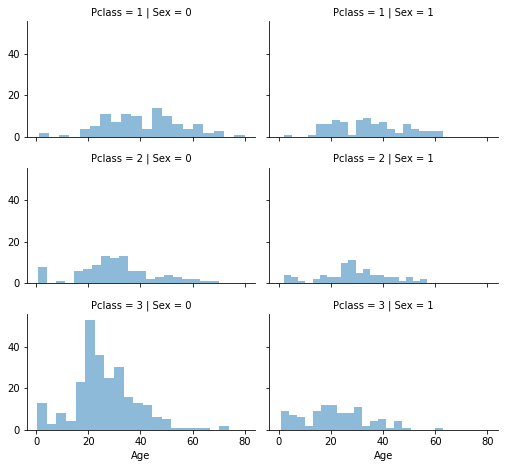

In [57]:
# Distributoin of Age by Pclass and gender
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

We will use the features `Sex` and `Pclass` to predict and repalce the `Age` column by the the median.

In [58]:
# create an numpy array for predict ages
predicted_ages = np.zeros((2,3))
predicted_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [59]:
for df in all_df:
    for index in range(0, 2):
        for col in range (0,3):
            predicted_data = df[(df['Sex'] == index) & (df['Pclass'] == col+1)]['Age'].dropna()
            age_guess = predicted_data.median()
            # Convert random age floats to nearest .5 age
            predicted_ages[index,col] = int(age_guess/0.5 + 0.5) * 0.5

    for index in range(0,2):
        for col in range(0,3):
            df.loc[(df['Age'].isnull()) & (df['Sex'] == index) & (df['Pclass'] == col+1),['Age']] = predicted_ages[index,col]
    df['Age'] = df['Age'].astype(int)
    
    # NaN values after replacing Age with median 
    nan_count_df = df.isnull().sum().sort_values(ascending=False)
    print(('-' * 10),df.name,('-' * 10))
    print(nan_count_df[nan_count_df > 0])

---------- train_df ----------
Cabin    687
dtype: int64
---------- test_df ----------
Cabin    327
dtype: int64


### Droping Columns

By droping features, we are dealing with less data points. Which again, speeds up our notebook and eases our analysis.  We can now drop `Ticket`, `Cabin`, and `PassengerId` as we won't use these for model prediction.  Before we do so, we will sve the values of `PassengerId` from the test set to a submission dataset that we will use later to submit our predeictions of these values.

We will also drop the PassengerID column from the test set since we would not need that for prediction as well.

In [60]:
# Create new df for submitssion using Passenger Ids from test set
submit_df = test_df['PassengerId']
display(submit_df.head())

# Drop Ticket and Cabin columns
for df in all_df:
    print(('-' * 25),df.name,('-' * 25))
    print(f'Number of columns in {df.name} before dropping Ticket and Cabin: {len(df.columns)}')
    df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    print(f'Number of columns {df.name} after dropping: {len(df.columns)}')

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

------------------------- train_df -------------------------
Number of columns in train_df before dropping Ticket and Cabin: 12
Number of columns train_df after dropping: 9
------------------------- test_df -------------------------
Number of columns in test_df before dropping Ticket and Cabin: 11
Number of columns test_df after dropping: 8


## Data Processing - Feature Enginerring

Feature engineering is the process of creating new features from existing features.  

#### Create a Title Feature

In [61]:
#Reference https://www.kaggle.com/questions-and-answers/141854

# Get title by extracting from Name column
for df in all_df:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    # display(df['Title'].value_counts())
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [62]:
# Simplify Titles
for df in all_df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Dr', 'Rev'], 'Professions')
    df['Title'] = df['Title'].replace(['Col', 'Major'], 'Military')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.7937
2,Miss,0.7027
0,Master,0.5750
1,Military,0.5000
6,Rare,0.5000
5,Professions,0.2308
3,Mr,0.1567


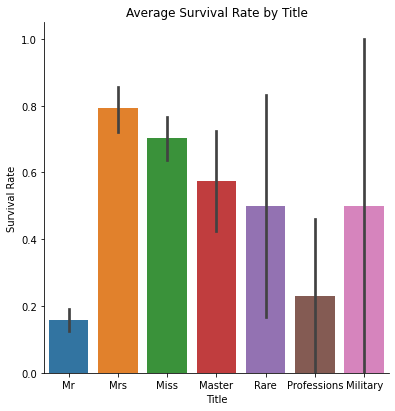

In [63]:
# Barplot for Survival Rate by Title
sns.factorplot(x='Title', y='Survived', data=train_df, kind='bar', height=5.6)
plt.title('Average Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.show()

We simplified the titles to 7 categories.  By looking at the survivability rate, we can assume that women, upper class, and military personel were prioritized in evacuations.

Now that we have the `Title` feature, we no longer need to `Name` column and can drop it from the datasets

In [64]:
for df in all_df:
    print(('-' * 25),df.name,('-' * 25))
    print(f'Number of columns in {df.name} before droping: {len(df.columns)}')
    df.drop(['Name'], axis=1, inplace=True)
    print(f'Number of columns {df.name} after droping: {len(df.columns)}')

------------------------- train_df -------------------------
Number of columns in train_df before droping: 10
Number of columns train_df after droping: 9
------------------------- test_df -------------------------
Number of columns in test_df before droping: 9
Number of columns test_df after droping: 8


#### Create a IsAlone Feature 

This IsAlone feature will represent passengers who aboard by themselves or with a family 

To so do, we would first create another column called FamilySize by combining the SibSp and Parch featues

In [65]:
# Create FamilySize feature by combinging SibSp and Parch 
for df in all_df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'],  as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.7241
2,3,0.5784
1,2,0.5528
6,7,0.3333
0,1,0.3035
4,5,0.2000
5,6,0.1364
7,8,0.0000
8,11,0.0000


In [66]:
# Create IsAlone feature from FamilySize column
# IsAlone 0 = No, 1 = Yes
for df in all_df:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'],  as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.5056
1,1,0.3035


From the new column we created, `IsAlone`, we can see that passengers that were aboard by themselves and without a family had a higher survivabilty rate.

Now that we have a couple new features, we will also go ahead and drop some more columns that we don't need anymore.  Those columns would be `SibSp`, `Parch`, and `FamilySize`

In [67]:
for df in all_df:
    print(('-' * 25),df.name,('-' * 25))
    print(f'Number of columns in {df.name} before droping: {len(df.columns)}')
    df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
    print(f'Number of columns {df.name} after droping: {len(df.columns)}')

------------------------- train_df -------------------------
Number of columns in train_df before droping: 11
Number of columns train_df after droping: 8
------------------------- test_df -------------------------
Number of columns in test_df before droping: 10
Number of columns test_df after droping: 7


## Feature Encoding

Machine learning models need all the input and output values to be numeric.  So the final step before creating the models is to transform the data to numeric values. We have already done so for the `Sex` column.  The columns we have left to convert to numeric are `Title` and `Embarked`. We can do so by creating dummy variables for each category in these features.  We will also convert `Pclass` to dummy variables as well.

We will transform the `Age` and `Fare` features into [ordinal variables](https://www.scribbr.com/statistics/ordinal-data/).  Ordinal varaibles are like categorical variables with a natural rank order associated to their value.

In [68]:
for df in all_df:
    display(df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,Mr,0
1,1,1,1,38,71.2833,C,Mrs,0
2,1,3,1,26,7.9250,S,Miss,1
3,1,1,1,35,53.1000,S,Mrs,0
4,0,3,0,35,8.0500,S,Mr,1


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,34,7.8292,Q,Mr,1
1,3,1,47,7.0000,S,Mrs,0
2,2,0,62,9.6875,Q,Mr,1
3,3,0,27,8.6625,S,Mr,1
4,3,1,22,12.2875,S,Mrs,0


#### Using Dummy Variables

In [69]:
# # Alternative method, 
# Logistic Regression, SVM, and KNN had lower accuracy with this method. Dummies preffered

# title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Military': 5, 'Profession': 6, 'Rare': 7}

# # Encoding Title
# for df in all_df:
#     df['Title'] = df['Title'].map(title_map)
#     df['Title'] = df['Title'].fillna(0)
#     display(df.head())

# Encoding Embarked
# for df in all_df:
#     df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
#     display(df.head())

In [70]:
# Get dummies for Embarked and Title
for df in all_df:
    # Title Dummies
    dummy_df = pd.get_dummies(df ,columns = ['Title'])
    dummy_df = dummy_df[['Title_Master', 'Title_Military', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Professions', 'Title_Rare']]
    df[['Title_Master', 'Title_Military', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Professions', 'Title_Rare']] = dummy_df
    # Drop Title column
    df.drop(['Title'], axis=1, inplace=True)
    
    # Embarked Dummies
    dummy_df = pd.get_dummies(df, columns = ['Embarked'], prefix='Em')
    dummy_df = dummy_df[['Em_S', 'Em_C', 'Em_Q']]
    df[['Em_S', 'Em_C', 'Em_Q']] = dummy_df
    # Drop Embarked colummn
    df.drop(['Embarked'], axis=1, inplace=True)
    
    # Note: KNN model performs 0.01% more accurately when Pclass is not converted to dummies
    # Pclass Dummies
    dummy_df = pd.get_dummies(df, columns = ['Pclass'])
    dummy_df = dummy_df[['Pclass_1', 'Pclass_2', 'Pclass_3']]
    df[['Pclass_1', 'Pclass_2', 'Pclass_3']] = dummy_df
    # Drop Embarked colummn
    df.drop(['Pclass'], axis=1, inplace=True)
    
    print(df.name)
    display(df.head())

train_df


,Survived,Sex,Age,Fare,IsAlone,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professions,Title_Rare,Em_S,Em_C,Em_Q,Pclass_1,Pclass_2,Pclass_3
0,0,0,22,7.2500,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1,1,38,71.2833,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,26,7.9250,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,1,35,53.1000,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,0,35,8.0500,1,0,0,0,1,0,0,0,1,0,0,0,0,1


test_df


,Sex,Age,Fare,IsAlone,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professions,Title_Rare,Em_S,Em_C,Em_Q,Pclass_1,Pclass_2,Pclass_3
0,0,34,7.8292,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1,1,47,7.0000,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,62,9.6875,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,27,8.6625,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,22,12.2875,0,0,0,0,0,1,0,0,1,0,0,0,0,1


#### Convert Age Feature

We will split the `Age` feature into 5 band and assign a number to each band. 

In [71]:
# Split Age feature into 5 bands
train_df['AgeBand'] = pd.qcut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.001, 20.0]",0.4556
1,"(20.0, 25.0]",0.2957
2,"(25.0, 30.0]",0.3802
3,"(30.0, 40.0]",0.4486
4,"(40.0, 80.0]",0.3716


In [72]:
# Convert Age to ordinal values
for df in all_df:
    df.loc[df['Age'] <= 20, 'Age'] = 0
    df.loc[(df['Age'] > 20) & (df['Age'] <= 25), 'Age'] = 1
    df.loc[(df['Age'] > 25) & (df['Age'] <= 30), 'Age'] = 2
    df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 3
    df.loc[df['Age'] > 40, 'Age'] = 4

# Drop AgeBand Column
train_df.drop(['AgeBand'], axis=1, inplace=True)

In [73]:
# Survival Rate by Age feature
train_df[['Age', 'Survived']].groupby(['Age'],  as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.4556
3,3,0.4486
2,2,0.3802
4,4,0.3716
1,1,0.2957


#### Convert Fare Feature

Now for the Fare feature, we will do the same with what we did with the Age column by dividing the column into 4 banks and assinging a rank to each band.

In [74]:
# Split Fare feature into 4 bands
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.1973
1,"(7.91, 14.454]",0.3036
2,"(14.454, 31.0]",0.4550
3,"(31.0, 512.329]",0.5811


In [75]:
# Convert to ordinal values
for df in all_df:
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3

# Drop FareBand column
train_df.drop(['FareBand'], axis=1, inplace=True)

In [76]:
# Survival Rate by Fare feature
train_df[['Fare', 'Survived']].groupby(['Fare'],  as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
3,3.0,0.5811
2,2.0,0.4454
1,1.0,0.3088
0,0.0,0.1973


In [77]:
# Final Results
for df in all_df:
    display(df.head())

,Survived,Sex,Age,Fare,IsAlone,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professions,Title_Rare,Em_S,Em_C,Em_Q,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1,1,3,3.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,2,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,1,3,3.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,0,3,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


,Sex,Age,Fare,IsAlone,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professions,Title_Rare,Em_S,Em_C,Em_Q,Pclass_1,Pclass_2,Pclass_3
0,0,3,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1,1,4,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,4,1.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,2,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,1,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


## Model Building

Now that we have all or data sorted out and ready for machine learning, we have to pick the right model.  In order to do so, we have to go back to the problem and understand what model is best.  Since we are trying to figure out the likelihood if a passenger aboard would survive, this is a binary classification problem. The models best for this and the ones we will be building are:
- Logistic Regression
- Support Vector Machine
- K Nearest Neighbors
- Decision Trees
- Random Forest

In [78]:
# Assign datasets to variavles for models
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

X_test = test_df.copy()
X_train.shape, y_train.shape, X_test.shape

((891, 17), (891,), (418, 17))

### Logistic Regression

Logistic regression is good for binary classification and multiclass classification when probabilties are involved.  Since we would like to predict the probabily of weather a passenger survived (a binary outcome), this a good model to use.

In [79]:
logR = LogisticRegression()

logR.fit(X_train, y_train)
log_yhat = logR.predict(X_test)

# Accuracy of model
log_acc = round(logR.score(X_train, y_train) * 100, 2)
print(f'Accuracy of model: {log_acc}%')

Accuracy of model: 82.72%


### Support Vector Machine (SVM)

SVMs is another supervised learning model used for classification and regression analysis.

In [80]:
svm = SVC()

svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

svm_acc = round(svm.score(X_train, y_train) * 100, 2)
print(f'Accuracy of model: {svm_acc}%')

Accuracy of model: 83.73%


### K Nearest Neighbors (KNN)

KNN is another classification machine learning model, but before we build this model, its a good idea to figure out the best numver for K.  We will do so by splitting the training set into its own training and testing sets and figuue out the best K to use by using a range of Ks from 1 - 10 and pick the one with the best accuracy.

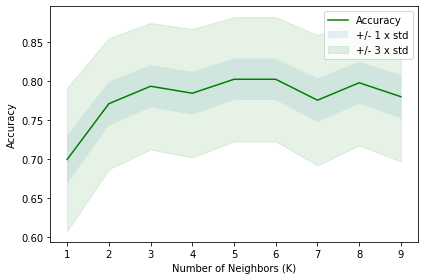

The best accuracy for KNN was with 0.8026905829596412 with K=5


In [81]:
# Find the best K
Knn_X_train, Knn_X_test, Knn_y_train, Knn_y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    KNN = KNeighborsClassifier(n_neighbors = n).fit(Knn_X_train, Knn_y_train)
    KNN_yhat = KNN.predict(Knn_X_test)
    mean_acc[n-1] = metrics.accuracy_score(Knn_y_test, KNN_yhat)

    std_acc[n-1] = np.std(KNN_yhat==Knn_y_test) / np.sqrt(KNN_yhat.shape[0])
    
# Visualize Accuracy by Ks 1-10
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.1)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.1, color='green')
plt.legend(('Accuracy', '+/- 1 x std', '+/- 3 x std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Best K
print(f'The best accuracy for KNN was with {mean_acc.max()} with K={mean_acc.argmax()+1}')

In [82]:
# Use best K (5) and train model
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

knn_acc = round(knn.score(X_train, y_train) * 100, 2)
print(f'Accuracy of model: {knn_acc}%')

Accuracy of model: 85.41%


### Decision Tree

Decision Tree is another classification model

In [83]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
tree_yhat = tree.predict(X_test)

tree_acc = round(tree.score(X_train, y_train) * 100, 2)
print(f'Accuracy of model: {tree_acc}%')

Accuracy of model: 88.44%


### Random Forest

Random Forrest is another calssification model

In [84]:
forest = RandomForestClassifier(n_estimators=100)

forest.fit(X_train, y_train)
forest_yhat = forest.predict(X_test)

forest_acc = round(forest.score(X_train, y_train) * 100, 2)
print(f'Accuracy of model: {forest_acc}%')

Accuracy of model: 88.44%


## Model Evaluations

#### Results

We will plot the results into a dataframe and see which models has the best accuracy.

In [85]:
accuracy_data = {
    'Model': ['Log Reg', 'SVM', 'KNN', 'Tree', 'Forest'],
    'Accuracy': [log_acc, svm_acc, knn_acc, tree_acc, forest_acc]
}

accuracy_df = pd.DataFrame(data=accuracy_data)
accuracy_df.set_index('Model', inplace = True)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df

,Accuracy
Model,
Tree,88.44
Forest,88.44
KNN,85.41
SVM,83.73
Log Reg,82.72


From the models we built, the Decision Tree and Random Forest came out with the best results (88% accuracy).  We will use these for our submission.

In [86]:
print('Predictions from Decision Tree model:')
tree_yhat

Predictions from Decision Tree model:


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [87]:
print('Predictions from Random Forest model:')
forest_yhat

Predictions from Random Forest model:


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

#### Areas to improve

Some thoughts on how we can improve on these models:
- Imputing missing values from Cabin column
- Feature engineer more columns
- Build on models with hyperameters (casting a bunch of parameters and choosing the best one for each model)

In [88]:
display(tree_yhat,forest_yhat)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## Submission

Now we have our predictions, we can go back and add with the PassengerIds and save to a csv for submission.

In [89]:
display(submit_df.head(),
        f'Length of submission dataset: {len(submit_df)}',
        f'Length of tree predictions: {len(tree_yhat)}', 
        f'Length of forest predictions: {len(forest_yhat)}')

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

'Length of submission dataset: 418'

'Length of tree predictions: 418'

'Length of forest predictions: 418'

In [90]:
# Submission 1 (Decision Tree Model) results
sub_1_data = {'PassengerId': submit_df, 'Survived': tree_yhat}
submission_1 = pd.DataFrame(data=sub_1_data)
submission_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [91]:
# Submission 2 (Random Forest Model) results
sub_2_data = {'PassengerId': submit_df, 'Survived': forest_yhat}
submission_2 = pd.DataFrame(data=sub_2_data)
submission_2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [92]:
# Save files to .csv
submission_1.to_csv('submission_1.csv', index =False) # Submission score : 0.77033
submission_2.to_csv('submission_2.csv', index =False) # Submission score : 0.77033